# SIO-211A Midterm

In [1]:
%matplotlib inline

In [2]:
# imports
import os
import numpy as np

import pandas

import h5py

from matplotlib import pyplot as plt
import seaborn as sns

import unyt

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

In [12]:

def set_fontsize(ax,fsz):
    '''
    Generate a Table of columns and so on
    Restrict to those systems where flg_clm > 0

    Parameters
    ----------
    ax : Matplotlib ax class
    fsz : float
      Font size
    '''
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fsz)


# Problem 1

# (i) Simple Gravity Waves

## (a) Governing Equations

## $\frac{\partial u}{\partial t} = - g \frac{\partial \eta}{\partial x}$

## $\frac{\partial v}{\partial t} = - g \frac{\partial \eta}{\partial y}$

## $\frac{\partial \eta}{\partial t} = - H \left ( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right )$

### with $g$ the gravitaional acceleration and $H$ the depth

### Massaging...

## $\frac{\partial^2 \eta}{\partial t^2} = g H \left [ \frac{\partial^2 \eta}{\partial x^2} + \frac{\partial^2 \eta}{\partial y^2} \right ]$

## (b) Restoring force

### Here it is purely gravity

## (c) Dispersion relationship

## $\omega^2 = gH \, k^2$

### with $k^2 = k_x^2 + k_y^2$

## (d) Phase velocity

## $C_p = \omega/k = \sqrt{gH}$

## (e) Group velocity

## $C_g = d\omega/dk = \sqrt{gH}$

# (ii) Coriolis included

## (a) Governing Equations

## $\frac{\partial u}{\partial t} = - g \frac{\partial \eta}{\partial x} + fv$

## $\frac{\partial v}{\partial t} = - g \frac{\partial \eta}{\partial y} - fu$

## $\frac{\partial \eta}{\partial t} = - H \left ( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right )$

### with $f$ the Coriolis parameter

## (b) Restoring force

### Gravity + Coriolis force

## (c) Dispersion relationship

## $\omega^2 = gH \, k^2 + f^2$

## (d) Phase velocity

## $C_p = \omega/k = \sqrt{gH \,k^2 + f^2}/k$

## (e) Group velocity

## $C_g = d\omega/dk = \frac{gH k}{\sqrt{gH \, k^2 + f^2}}$

# (iii) Kelvin Waves

## (a) Governing Equations -- for the case of $u=0$

## $g \frac{\partial \eta}{\partial x} = fv$

## $\frac{\partial v}{\partial t} = - g \frac{\partial \eta}{\partial y}$

## $\frac{\partial \eta}{\partial t} = - H \frac{\partial v}{\partial y}$

## (b) Restoring force

### Gravity + Coriolis force

## (c) Dispersion relationship

## $\omega^2 = gH \, k_y^2$

## (d), (e) Phase, Group Velocity

## $C_p = C_g = \sqrt{gH}$

# (iv) Rossby Waves

## (a) Governing Equations 

### Our main one is:

## $\frac{d}{dt} \left [ \zeta - \frac{f\eta}{H} \right ] + \beta v = 0$

### with $\zeta$ the relative vorticity and $\beta$ describes the change in $f$ with $y$

### We introduced the stream function:  $\psi = g \eta /f$ and recovered:

## $\frac{\partial}{\partial t} \left [ \nabla^2 \psi - \frac{1}{a^2} \psi \right ] + \beta \frac{\partial \psi}{\partial x} = 0$

### with $a$ the Rossby radius of deformation.

## (b) Restoring force

### Coriolis force (and PV conservation?)

## (c) Dispersion relation

## $\omega = \frac{- k_x \beta}{k_H^2 + k_R^2}$

### with $k_H^2 = k_x^2 + k_y^2$ and $k_R = 1/a$

## (d) Phase velocity

## $C_{p,x} = \frac{-\beta}{k_H^2 + k_R^2}$

### i.e. westward travelling!

## (e) Group velocity

## $C_{g,x} = \frac{-\beta}{k_H^2 + k_R^2} + \frac{2 k_x^2 \beta}{[k_H^2 + k_R^2]^2}$

----

# Problem 2

In [4]:
beta = 2e-11 / unyt.m / unyt.s
f = 8e-5 / unyt.s

In [5]:
g = 9.8 * unyt.m / unyt.s**2
H = 1 * unyt.km

In [6]:
# Rossby radius
a = np.sqrt(g*H)/f
a.to('km')

unyt_quantity(1237.43686708, 'km')

## Define wave numbers

In [17]:
k_x = 10**np.linspace(-5., 0., 200) / unyt.km

## Calculate dispersion relations

In [18]:
omega_SWE = np.sqrt(g*H * k_x**2).to('Hz')
omega_coriolis = np.sqrt(g*H * k_x**2 + f**2).to('Hz')

In [19]:
omega_Rossby = np.abs((-k_x * beta / (k_x**2 + 1/a**2)).to('Hz'))

## Plot

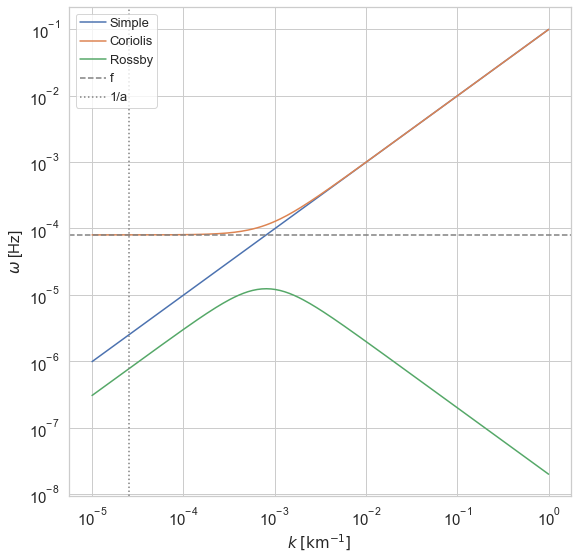

In [20]:
fig = plt.figure(figsize=(9,9))
ax = plt.gca()
#
ax.plot(k_x, omega_SWE, label='Simple')
ax.plot(k_x, omega_coriolis, label='Coriolis')
ax.plot(k_x, omega_Rossby, label='Rossby')

#
ax.set_xlabel(r'$k \; \rm [km^{-1}]$ ')
ax.set_ylabel(r'$\omega$ [Hz]')
#
ax.set_xscale('log')
ax.set_yscale('log')
#
ax.axhline(f, ls='--', color='gray', label='f')
ax.axvline(1/a, ls=':', color='gray', label='1/a')
#
legend = plt.legend(loc='upper left', scatterpoints=1, borderpad=0.3,
                    handletextpad=0.3, fontsize=13, numpoints=1)
#
set_fontsize(ax, 15.)
#
plt.show()

----

# Problem 3 -- Kelvin wave

## Height $\eta$

### Assume the Northern Hemisphere and a eastern boundary at $x=0$

### Solutions then have the form:

## $\eta = \eta_0 {\rm e^{x/L_d}} {\rm e^{i (k_y y - \omega t)}}$

### with $L_d = \sqrt{gH}/f$

### Plot

In [24]:
def eta_kelvin(x, y_ky, eta0=1., Ld=1000.):
    return eta0 * np.exp(x/Ld) * np.cos(y_ky)

In [25]:
x = np.linspace(-2000., 0., 200)

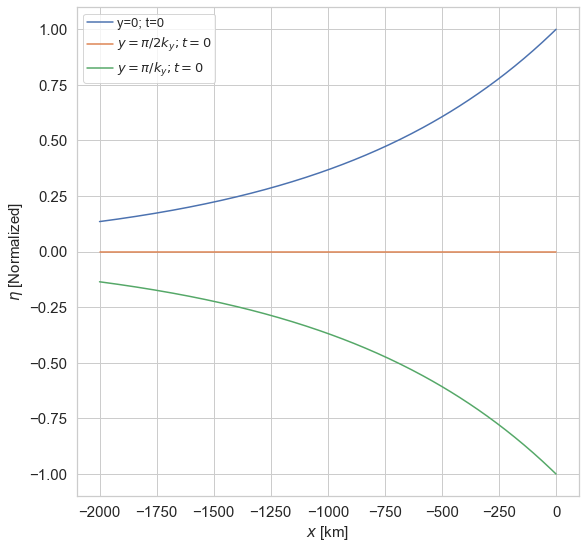

In [29]:
fig = plt.figure(figsize=(9,9))
ax = plt.gca()
#
ax.plot(x, eta_kelvin(x, 0.), label='y=0; t=0')
ax.plot(x, eta_kelvin(x, np.pi/2), label=r'$y=\pi/2 k_y; t=0$')
ax.plot(x, eta_kelvin(x, np.pi), label=r'$y=\pi/k_y; t=0$')

#
ax.set_xlabel(r'$x$ [km]')
ax.set_ylabel(r'$\eta$ [Normalized]')
#
#ax.set_xscale('log')
#ax.set_yscale('log')
#
legend = plt.legend(loc='upper left', scatterpoints=1, borderpad=0.3,
                    handletextpad=0.3, fontsize=13, numpoints=1)
#
set_fontsize(ax, 15.)
#
plt.show()

## Top-down view (i.e. x,y plane)

In [30]:
y = np.linspace(0., 8*np.pi, 100)

In [31]:
xx, yy = np.meshgrid(x, y)

In [32]:
eta_grid = eta_kelvin(xx, yy)

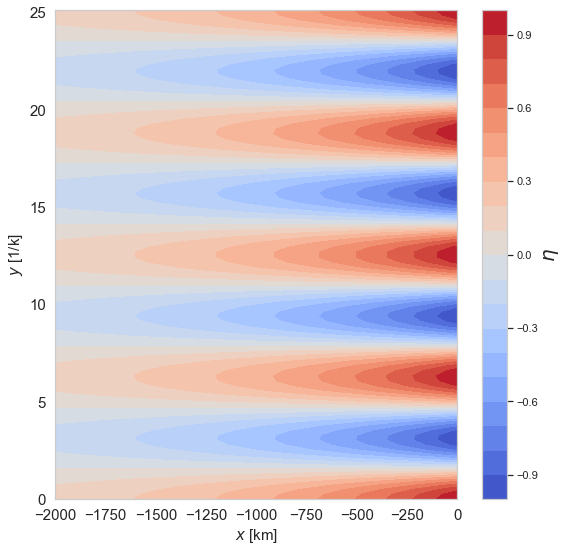

In [43]:
fig = plt.figure(figsize=(9,9))
ax = plt.gca()
#
cm = plt.get_cmap('coolwarm')

img = ax.contourf(xx, yy, eta_grid, levels=20, cmap=cm)
#
cb = plt.colorbar(img)
cb.set_label(r'$\eta$', fontsize=20.)
#
ax.set_xlabel(r'$x$ [km]')
ax.set_ylabel(r'$y$ [1/k]')
#
set_fontsize(ax, 15.)
#
plt.show()

## Velocity $v$

### The velocity $v$ is such that it is maximal upwards (positive $y$) where $\eta$ is maximal.  This follows from the fact that there is a pressure force towards negative $x$ and we need an opposite Coriolis force to balance.  In the Northern hemisphere, tha tis acheived by a flow northward (i.e. up).

### And maximal negative where $\eta$ is minimal.  So the map would like effectively identical to the one above.

### At regions where $\eta \approx 0$ with a negative region above (i.e. $y \approx 2$ in the figure),  we have a convergence of fluid.  This will lead to a new maximum.  

### Therefore, the peak of the wave (maximal $\eta$) is travelling up on our map towards positive $y$.

----

# Problem 4

## Equations:

## $\frac{\partial u}{\partial t} = - g \frac{\partial \eta}{\partial x} + fv + F_x(t)$

## $\frac{\partial v}{\partial t} = - g \frac{\partial \eta}{\partial y} - fu + F_y(t)$

## $\frac{\partial \eta}{\partial t} = - H \left ( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right )$

## (a) To derive the energy equation, we multiple the first by $Hu$ and the second by $Hv$ and the third by $g\eta$ and do a bit of manipulation (noting the Coriolis terms vanish):

## $\frac{H}{2} \frac{\partial}{\partial t} \left [ u^2 + v^2 + \frac{g}{H} \eta^2 \right ] = -gH \left[ \frac{\partial}{\partial x} (\eta u) + \frac{\partial}{\partial y} (\eta v) \right ] + H[F_x u + F_y y]$

### and then

## $\frac{\partial}{\partial t} \left [ \frac{H}{2} |\vec u|^2  + \frac{1}{2} g \eta^2 \right ] + \nabla \cdot (g H \eta \vec u) = H[F_x u + F_y y]$

## (b) Consider $F_x + i F_y = F_0 \exp(i \alpha t)$

### i.e.

## $F_x = F_0 \cos(\alpha t)$

## $F_y = F_0 \sin(\alpha t)$

### The energy added (or removed) will depend on how "in phase" $F$ is with the wave oscillation, i.e. the comparison of $\omega$ and $\alpha$

### Here are a few cases:

### (i) $\alpha \gg \omega$ -- In this case the forcing oscillates much faster than the wave and the net energy input is zero.

### (ii) $\alpha \ll \omega$ -- Similar despite the opposite limit.

### (iii) $\alpha \approx \omega$ -- If they are in phase (i.e. $u$ is positive when $F_x$ is positive and vice-versa) then energy is added.  If they are entirely out of phase, then energy is subtracted.

## (c) I admit to being stumped on this one.  That is, I don't see the distinction from part (b)

----

# Problem 5

## In Ringworld, the band appears thin enough that there is no variation in the Coriolis parameter, i.e. $\beta = 0$

## Therefore, I do not think this "ocean" can support Rossby waves.